In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as am
x=pd.read_csv("C:/Users/admin/Downloads/HeartDisease.csv")
df=pd.DataFrame(x)
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [4]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [5]:
df.corr()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Visualizing

<AxesSubplot:>

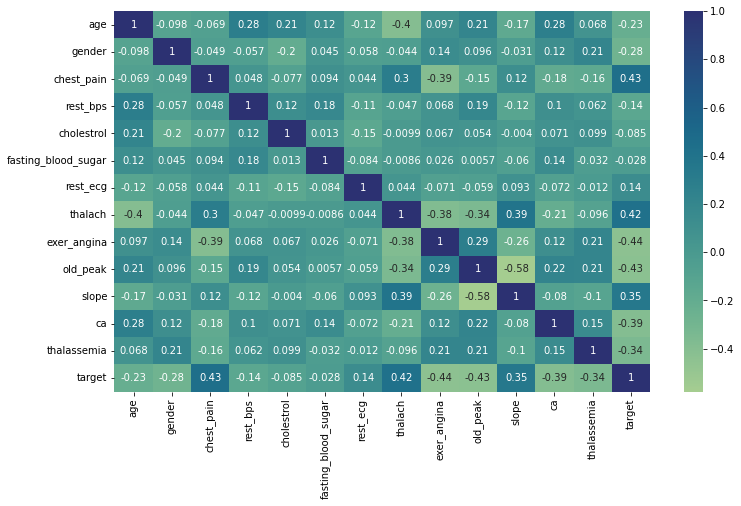

In [6]:
import seaborn as sns
corr=df.corr()
## Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(corr,annot=True,cmap='crest')

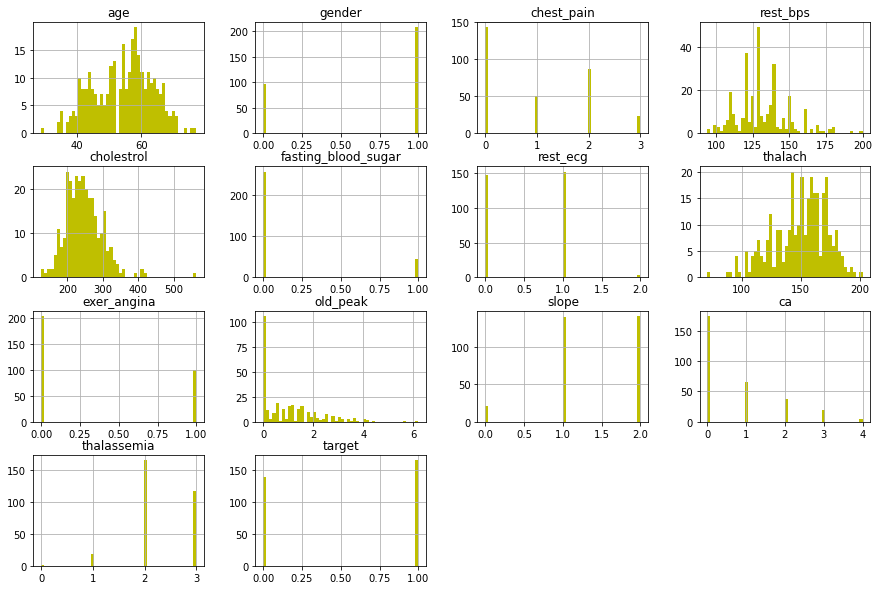

In [9]:
df.hist(bins=50, figsize=(15,10),color='y')
plt.show()

In [10]:
x=df.drop(["target","rest_ecg"],axis=1)
y=df.iloc[:,13]

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 12), (61, 12), (242,), (61,))

### DecisionTreeClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [14]:
y_pred=model.predict(x_test)
model.predict_proba(x_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

#### ACCURACY

In [15]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7868852459016393

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[21,  6],
       [ 7, 27]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



### roc_curve & roc_auc_score

In [18]:
# import roc_curve to compute recevier operating characterictics
from sklearn.metrics import roc_curve
#import roc_auc_score to calculate the area under the curve

from sklearn.metrics import roc_auc_score

In [19]:
#visualizing the ROC_AUC curve

y_proba=model.predict_proba(x_test)
y_predicted=y_proba[:,1]
print(y_predicted)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.]


In [20]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [21]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.7859477124183006


Text(0, 0.5, 'True positive rate(Sensitivity)')

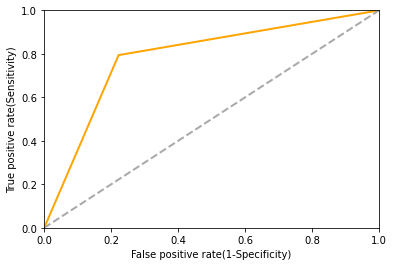

In [22]:
#plotting the roc_curve

plt.figure()
plt.plot(fpr,tpr,color='orange', lw=2, label='ROC curve(area  under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False positive rate(1-Specificity)")
plt.ylabel("True positive rate(Sensitivity)")

### GridSearchCV

In [23]:
from sklearn import decomposition,datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()
pca=decomposition.PCA()


In [27]:
 decisiontree = tree.DecisionTreeClassifier()    

In [28]:
decisiontree=tree.DecisionTreeClassifier()
pipe=Pipeline(steps=[('sc',sc),('pca',pca),('decisiontree',decisiontree)])

In [29]:
n_components=list(range(1,x.shape[1]+1,1))

In [30]:
criterion=['gini','entropy']

max_depth=[4,6,8,12]

In [31]:
parameters=dict(pca__n_components=n_components,decisiontree__criterion=criterion,decisiontree__max_depth=max_depth)


In [32]:
clf=GridSearchCV(pipe,parameters)

In [33]:
clf.fit(x,y)

GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                                       ('decisiontree',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontree__criterion': ['gini', 'entropy'],
                         'decisiontree__max_depth': [4, 6, 8, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12]})

In [28]:
print('Best Criterion:',clf.best_estimator_.get_params()['decisiontree__criterion'])

Best Criterion: entropy


In [29]:
print('Best max_depth:',clf.best_estimator_.get_params()['decisiontree__max_depth'])

Best max_depth: 4


In [30]:
print('Best Number Of Components:',clf.best_estimator_.get_params()['pca__n_components'])

Best Number Of Components: 2


In [31]:
print(clf.best_estimator_.get_params()['decisiontree'])    


DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [32]:
CV_Result = cross_val_score(clf, x, y, cv=4, n_jobs=-1)


In [33]:
print(CV_Result)

[0.72368421 0.82894737 0.80263158 0.69333333]


In [34]:
print(CV_Result.mean())


0.7621491228070176


In [35]:
print(CV_Result.std())  


0.055488731355827776


In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [38]:
X = scaler.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42)

### Bagging Technique

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
es=BaggingClassifier(DecisionTreeClassifier(random_state=10))
es.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10))

In [42]:
y_pred=es.predict(x_test)

In [43]:
from sklearn import metrics
bagging_score=metrics.roc_auc_score(y_pred,y_test)
print(bagging_score)

0.5192307692307692


#### Boosting techinque

In [44]:
from sklearn.ensemble import AdaBoostClassifier

# build the model
adaboost = AdaBoostClassifier(random_state=10)
# fit the model
adaboost.fit(X_train, y_train)



AdaBoostClassifier(random_state=10)

In [45]:
y_pred_adaboost  = adaboost.predict(X_test)

In [46]:
adaboost_score = metrics.roc_auc_score(y_test, y_pred_adaboost)

In [48]:
df = pd.DataFrame()
df['Model'] = ['accuracy','Bagging','AdaBoost']
df['AUC roc curve'] = [accuracy,bagging_score,adaboost_score]
df

,Model,AUC roc curve
0,accuracy,0.770492
1,Bagging,0.519231
2,AdaBoost,0.821659


<BarContainer object of 3 artists>

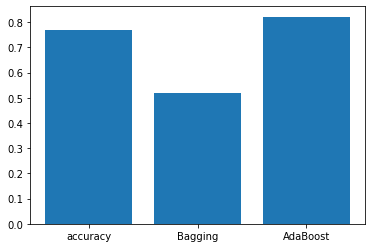

In [49]:
import matplotlib.pyplot as plt
plt.bar(x=df['Model'],height=df['AUC roc curve'])
